<a href="https://colab.research.google.com/github/hflautert/MISC/blob/main/SeminarioIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [ ]:
# Google Drive
from google.colab import drive 

In [ ]:
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/aa Mestrado UFSC/20221 INE6116000 - Inteligência Artificial Conexionista/sem-iac

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/aa Mestrado UFSC/20221 INE6116000 - Inteligência Artificial Conexionista/sem-iac


In [ ]:
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download
dados = pd.read_csv('data.csv')
dados.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dados.shape

(569, 33)

Removendo dados desnecessários:

In [ ]:
list = ['Unnamed: 32','id']
x = dados.drop(list,axis = 1 )
x.shape

(569, 31)

Verificando balanceamento da classe

Número de Benignos:  357
Número de Malignos :  212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


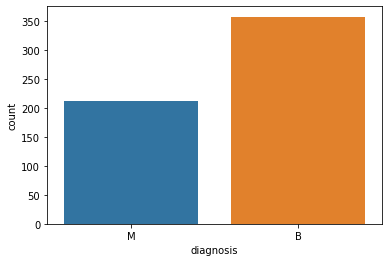

In [ ]:
y = dados.diagnosis   
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Número de Benignos: ',B)
print('Número de Malignos : ',M)

Exibindo correlação:

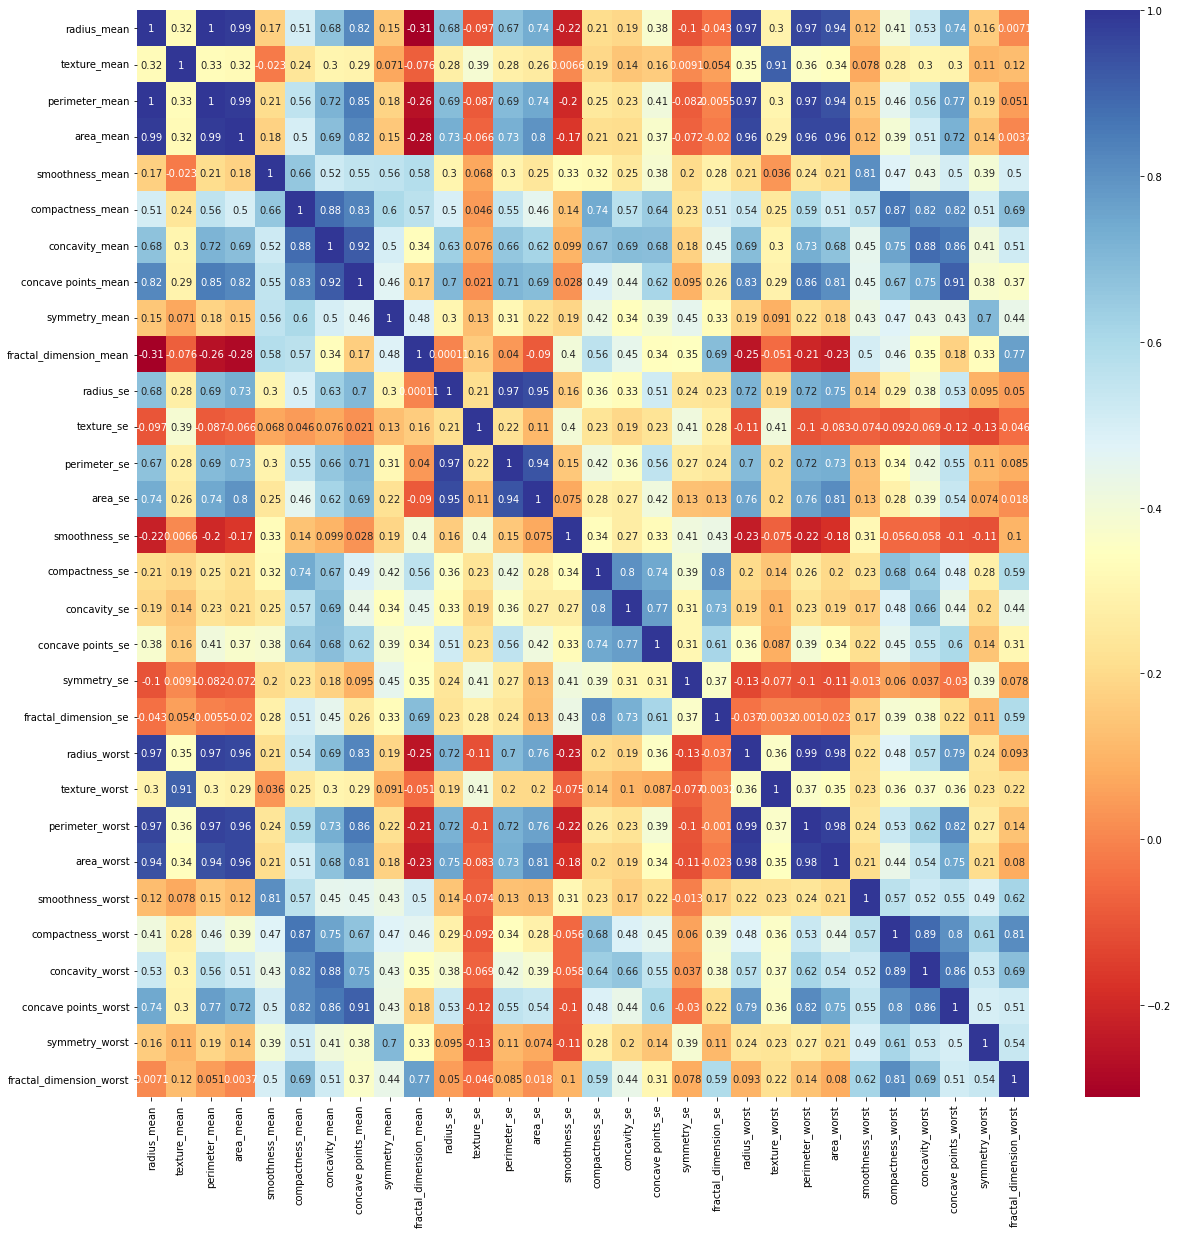

In [ ]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(x.corr(), annot = True, cmap="RdYlBu")

Função para limpar colunos de correlação x.

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.shape)

In [ ]:
correlation(x, 0.8)

(569, 15)


Dividindo dados em treino e teste:

In [ ]:
teste,treino=train_test_split(x,test_size=0.3,random_state=1)

Removendo coluna de resultado/diagnóstico.

In [ ]:
x_treino=treino.drop('diagnosis',axis=1)
y_treino=treino['diagnosis']
x_teste=teste.drop('diagnosis',axis=1)
y_teste=teste['diagnosis']

Regressão Logistica

In [ ]:
rl=LogisticRegression(class_weight='balanced')
rl.fit(x_treino,y_treino)

LogisticRegression(class_weight='balanced')

In [ ]:
predicted_probs=rl.predict_proba(x_teste)[:,1]

In [ ]:
print('Precisão ROC AUC:',roc_auc_score(y_teste,predicted_probs))

Precisão ROC AUC: 0.9761461955203364


Precisão atingida:  0.9170854271356784


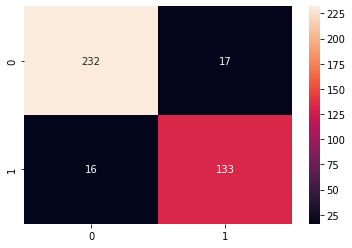

In [ ]:
ac = accuracy_score(y_teste,rl.predict(x_teste))
print('Precisão atingida: ',ac)
cm = confusion_matrix(y_teste,rl.predict(x_teste))
sns.heatmap(cm,annot=True,fmt="d")

Árvore de Decisão - Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_treino,y_treino)

DecisionTreeClassifier()

In [ ]:
predicted_probs_dt=dt.predict_proba(x_teste)[:,1]
print('Precisão ROC AUC:',roc_auc_score(y_teste,predicted_probs_dt) )

Precisão ROC AUC: 0.8947332955985013


Precisão atingida:  0.9020100502512562


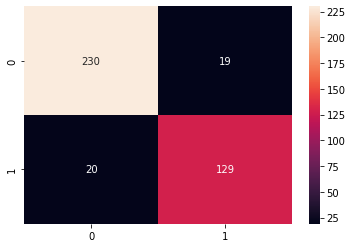

In [ ]:
ac = accuracy_score(y_teste,dt.predict(x_teste))
print('Precisão atingida: ',ac)
cm = confusion_matrix(y_teste,dt.predict(x_teste))
sns.heatmap(cm,annot=True,fmt="d")

Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(x_treino,y_treino)

RandomForestClassifier(class_weight='balanced')

In [ ]:
predicted_probs_rf=rf.predict_proba(x_teste)[:,1]
print('Precisão ROC AUC:',roc_auc_score(y_teste,predicted_probs_rf))

Precisão ROC AUC: 0.9902158971456294


Precisão atingida:  0.9396984924623115


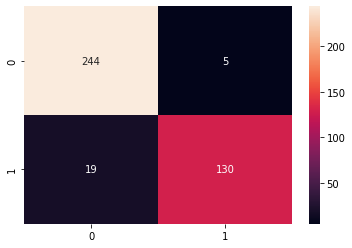

In [ ]:
ac = accuracy_score(y_teste,rf.predict(x_teste))
print('Precisão atingida: ',ac)
cm = confusion_matrix(y_teste,rf.predict(x_teste))
sns.heatmap(cm,annot=True,fmt="d")

XG Boost Classifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_treino,y_treino)

XGBClassifier()

In [ ]:
predicted_probs_xgb=xgb.predict_proba(x_teste)[:,1]
print('Precisão ROC AUC:',roc_auc_score(y_teste,predicted_probs_xgb))

Precisão ROC AUC: 0.9889760383817148


Precisão atingida:  0.9472361809045227


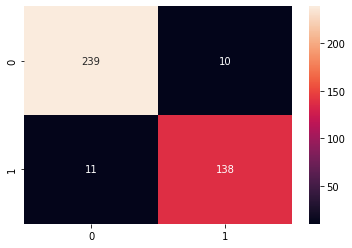

In [ ]:
ac = accuracy_score(y_teste,xgb.predict(x_teste))
print('Precisão atingida: ',ac)
cm = confusion_matrix(y_teste,xgb.predict(x_teste))
sns.heatmap(cm,annot=True,fmt="d")